In [26]:
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 70
pd.options.display.max_rows = 20

top10_data_industry = pd.read_csv('top_10.csv', header = None)
top10_data_industry = top10_data_industry.transpose()

top10_data_industry.columns = top10_data_industry.iloc[0] # set column header
top10_data_industry = top10_data_industry.drop(0) # drop duplicated row
top10_data_industry = top10_data_industry.drop(1) # drop scores row
top10_data_industry = top10_data_industry.drop(8) # drop scores row

top10_data_industry['cat'] = "top 10" # create top/overall cat

top10_data_industry.rename(columns={'industry':'thermometer'}, inplace=True)

top100_data_industry = pd.read_csv('top_100.csv', header = None)
top100_data_industry = top100_data_industry.transpose()

top100_data_industry.columns = top100_data_industry.iloc[0] # set column header
top100_data_industry = top100_data_industry.drop(0) # drop duplicated row
top100_data_industry = top100_data_industry.drop(1) # drop scores row
top100_data_industry = top100_data_industry.drop(8) # drop scores row

top100_data_industry['cat'] = "top 100" # create top/overall cat

top100_data_industry.rename(columns={'industry':'thermometer'}, inplace=True)

#top10_data_industry

#top10_data_industry = pd.melt(top10_data_industry, id_vars=['thermometer', 'cat'], value_vars=['automotive-automotive-other'])
#top100_data_industry = pd.melt(top100_data_industry, id_vars=['thermometer', 'cat'], value_vars=['automotive-automotive-other'])

top10_data_industry
#result = top10_data_industry.append(top100_data_industry)

#result

,thermometer,automotive-automotive-other,automotive-automotive-other,automotive-automotive-other,automotive-automotive-other,automotive-automotive-other,automotive-automotive-other,automotive-automotive-other,automotive-automotive-other,automotive-automotive-other,automotive-automotive-other,automotive-dealer,automotive-dealer,automotive-dealer,automotive-dealer,automotive-dealer,automotive-dealer,automotive-dealer,automotive-dealer,automotive-dealer,automotive-dealer,automotive-oem,automotive-oem,automotive-oem,automotive-oem,automotive-oem,automotive-oem,automotive-oem,automotive-oem,automotive-oem,automotive-oem,automotive-parts,automotive-parts,automotive-parts,automotive-parts,...,technology-mobile-provider,technology-mobile-provider,technology-mobile-provider,technology-mobile-provider,technology-mobile-provider,technology-mobile-provider,technology-mobile-provider,technology-technology-other,technology-technology-other,technology-technology-other,technology-technology-other,technology-technology-other,technology-technology-other,technology-technology-other,technology-technology-other,technology-technology-other,technology-technology-other,uk-take-away-food-supplier,uk-take-away-food-supplier,uk-take-away-food-supplier,uk-take-away-food-supplier,uk-take-away-food-supplier,uk-take-away-food-supplier,uk-take-away-food-supplier,uk-take-away-food-supplier,uk-take-away-food-supplier,uk-take-away-food-supplier,wedding-&-special-events-entertainers,wedding-&-special-events-event-planners,wedding-&-special-events-event-planners,wedding-&-special-events-party-venues,wedding-&-special-events-party-venues,wedding-&-special-events-wedding-&-special-events-other,wedding-&-special-events-wedding-&-special-events-other,cat
2,a_weighted_rating,0.800508673406529,0.899243370723261,0.617104285874213,1.0,0.996440454544235,0.840841115691487,0.84931235014502,0.907483908788999,0.963082229444482,0.964802336509867,0.936721080497514,0.932931986640584,0.929892024556004,0.917984973019935,0.891387798851375,0.959963550183952,0.967524526976454,0.89627468513425,0.950425885502596,0.929892024556004,0.949798472334844,0.899196035154351,0.875319939238088,0.864990128673551,0.89111501458004,0.983771466226903,0.963329297193199,0.988988089054702,0.94588850138428,0.934009696958765,0.92525405130356,0.797545435315269,0.93594217577892,0.876275748158679,...,0.958188071022832,0.993314954472557,0.994680060523282,0.991790027915974,1.0,1.0,1.0,0.402100406249288,0.442615074417497,0.448385156113648,0.475728746315184,0.443490730739315,0.830931257280517,0.87349968203625,0.618923234210085,1.0,0.98655506105358,0.670466718422665,1.0,0.704973623434389,1.0,0.625483899717229,0.81891329313978,0.388004983740717,0.391206253458215,0.476595474057501,0.408091416513515,0.0,0.0,0.144590711077755,0.425738056664571,0.556529580708814,0.771231632096678,0.166085912422698,top 10
3,a_visibility,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,top 10
4,a_spread,0.45,0.88,0.598076923076923,0.5,0.348245614035088,0.88,0.88,0.561494252873563,0.462857142857143,0.653333333333333,0.630924369747899,0.549521072796935,0.760108303249098,0.603711083437111,0.769761904761905,0.57590015128593,0.668571428571429,0.802226720647773,0.665223097112861,0.760108303249098,0.41,0.304490161001789,0.416802721088435,0.422345679012346,0.391764705882353,0.38,0.138974358974359,0.38,0.41,0.6,0.38,0.546153846153846,0.38,0.88,...,0.5,0.5,0.5,0.5,0.5,0.5,0.558461538461539,0.571428571428571,0.5,0.4,0.268068965517241,0.545467625899281,0.353478260869565,0.319354632587859,0.41045197740113,0.5,0.541111111111111,0.3,0.3,0.3,0.3,0.3,0.43,0.3,0.3,0.43,0.43,0.0,0.0,0.43,0.538249158249158,0.88,0.38,0.55,top 10
5,a_volume,0.45,0.275,0.675,0.475,0.475,0.6,0.65,0.575,0.57,0.67,0.772727272727273,0.87,0.912121212121212,0.

automotive-automotive-other


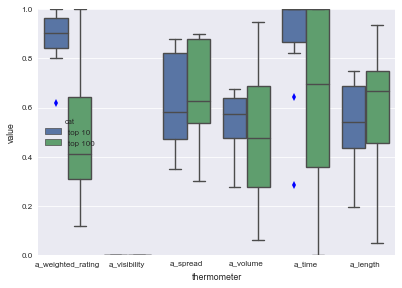

automotive-dealer


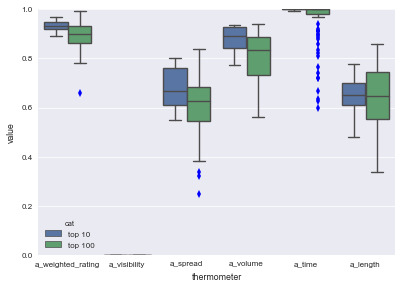

automotive-oem


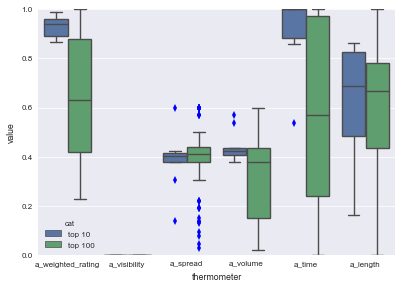

automotive-parts


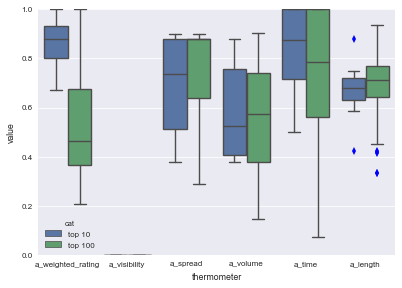

automotive-rental


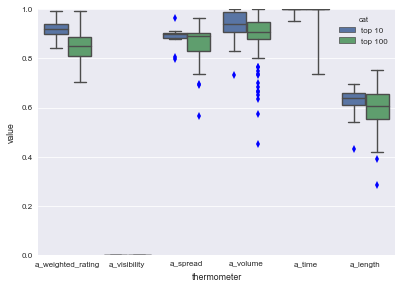

automotive-repair-&-service


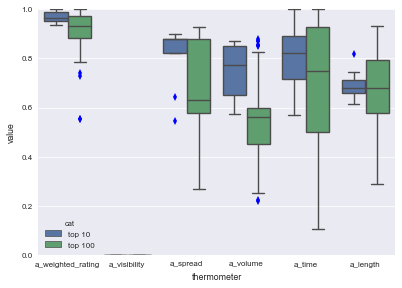

automotive-tires


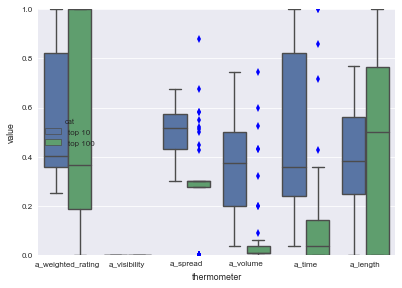

beauty-beauty-other


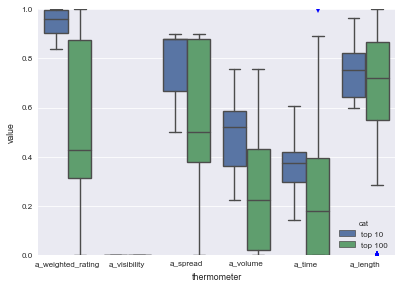

beauty-hair-grooming


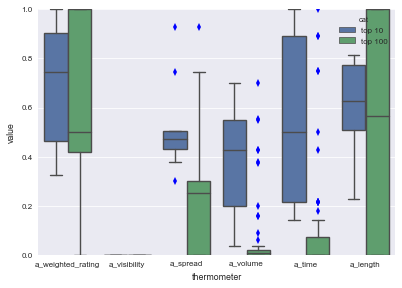

beauty-skin-care


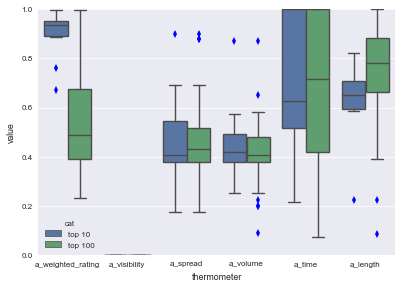

beauty-spa


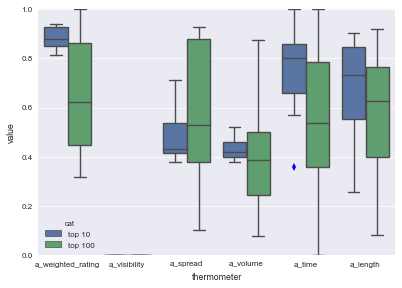

default-default


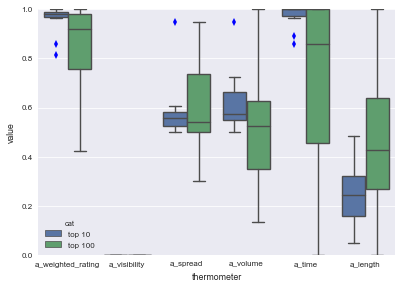

education-education-other


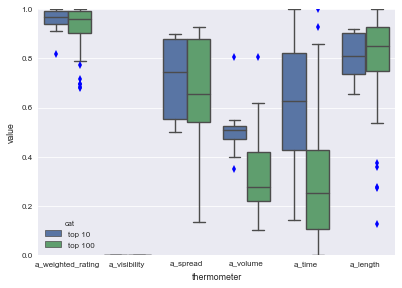

In [ ]:
import matplotlib.pyplot as plt

prev = None # print unique columns

for column in top10_data_industry:
    if column != "cat" and column != "thermometer" and column != prev:
        print column
        prev = column
        temp = pd.melt(top10_data_industry, id_vars=['thermometer', 'cat'], value_vars=[column])
        temp100 = pd.melt(top100_data_industry, id_vars=['thermometer', 'cat'], value_vars=[column])
        result = temp.append(temp100)
        result['value'] = result['value'].astype(float)
        sns.set()
        sns.set_context("paper")
        sns.boxplot(x="thermometer", y="value", hue='cat', data=result)
        plt.show()